# Hands-on Assignment: Data Visualization with Matplotlib

In this hands-on assignment, we'll use the matplotlib python library to visualize a dataset. The dataset we'll be using is a medical dataset with information about some patients on metrics like glucose, insulin levels, and other metrics related to diabetes. The assignment will serve two primary objectives - (a) practice matplotlib on a realistic task, and (b) learn how one can visualize and present a dataset.

First, we'll import numpy, pandas and matplotlib. Then, we'll load the dataset, clean it, and also create a normalized dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
  bad = (dataset[column] == 0)
  dataset.loc[bad, column] = None

In [4]:
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
normalized = (dataset - dataset.mean()) / dataset.std()
normalized["Outcome"] = (normalized["Outcome"] > 0.0)

Task 1: Using Bar plot to compare feature values by Outcome
First, we'll create a bar plot to compare the values each feature takes depending on whether or not the person has diabetes.

Creating the bar plot
The result should look like the following. (In this entire tutorial, green = non-diabetic (= safe and red = diabetic (= danger)).

In [6]:
## bar plot data
diabetic_means  = normalized[normalized["Outcome"] == True].mean()[:-1]
diabetic_stds   = normalized[normalized["Outcome"] == True].std()[:-1]

non_diabetic_means = normalized[normalized["Outcome"] == False].mean()[:-1]
non_diabetic_stds  = normalized[normalized["Outcome"] == False].std()[:-1]

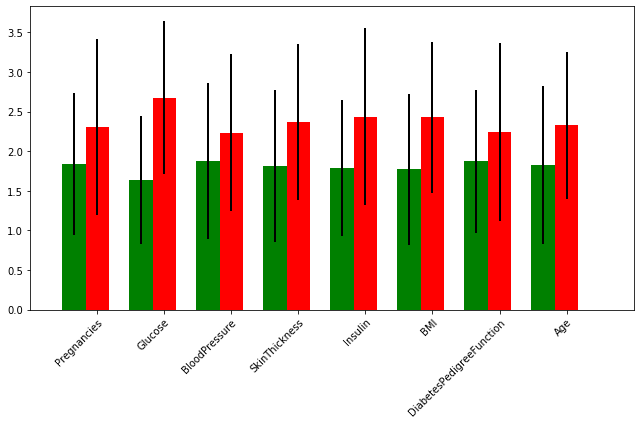

In [7]:
## bar plot

fig = plt.figure(figsize=(9, 6))

indices = np.arange(len(diabetic_means))
width = 0.35
error_args = {'ecolor': (0, 0, 0), 'linewidth': 2.0}

p1 = plt.bar(indices, diabetic_means + 2.0, width, yerr=diabetic_stds, color='r', error_kw=error_args)
p2 = plt.bar(indices-width, non_diabetic_means + 2.0, width, yerr=non_diabetic_stds, color='g', error_kw=error_args)

ax = plt.gca()
ax.set_xlim(-1.0, 8)
ax.set_xticks(indices)
ax.set_xticklabels(diabetic_means.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()

# plt.show()
fig.savefig('barplot.png')

Some notes:

We're using normalized values here, so that we can plot all variables in the same plot.
The bar heights = mean + 2.0, and the error bars = standard deviation. The +2.0 is being done since it is widely accepted that standard deviation of 2.0 is an outlier / interesting data point.
The following snippet can be used to rotate the x-axis labels and make sure they don't get cut-off.

Reading the plot
The main conclusions we can draw from the plot is that although a lot of variables are indicators for diabetic vs non-diabetic, none of them is a clear indicator. This is because there is significant overlap within 1 standard deviation among the two classes of people.

Histogram for each feature
Although the barplots gave us a rough idea of what each feature looks like, we'd like take a deeper look at each feature's distribution among diabetic and non-diabetic folks.

Our goal is to create histograms that look similar to the following.

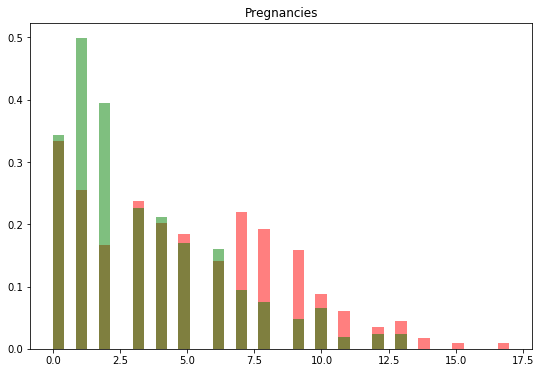

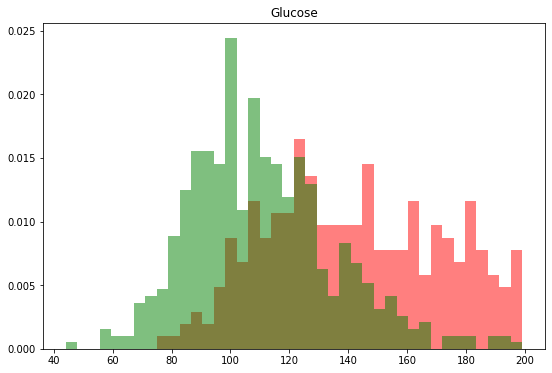

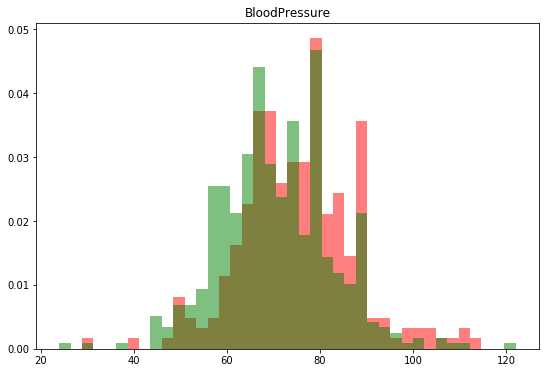

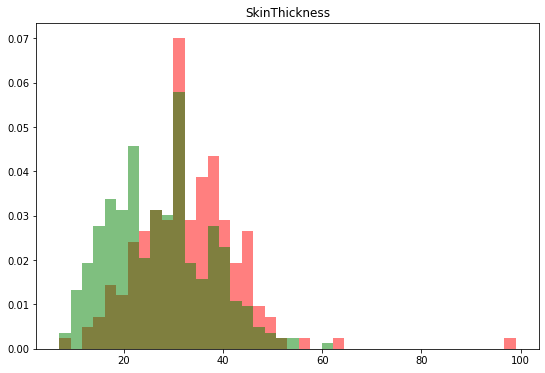

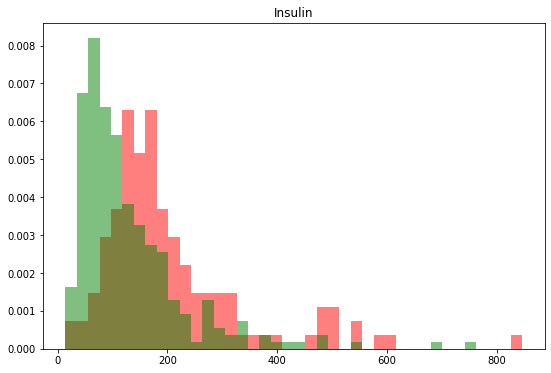

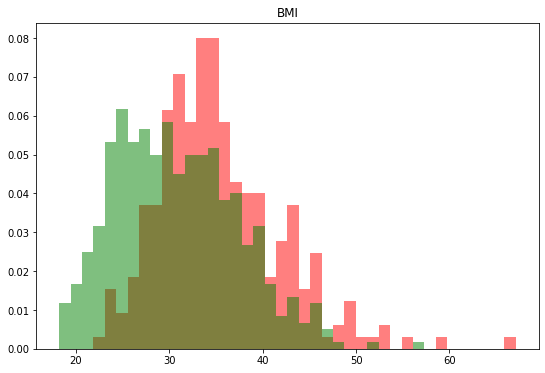

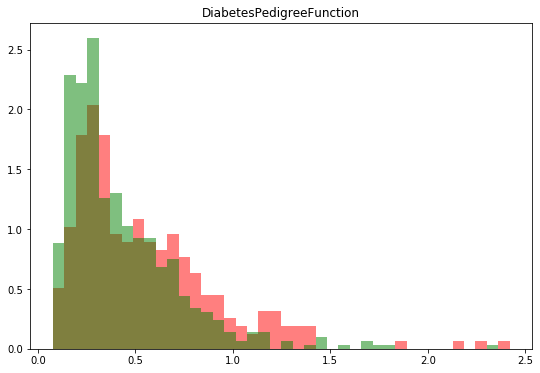

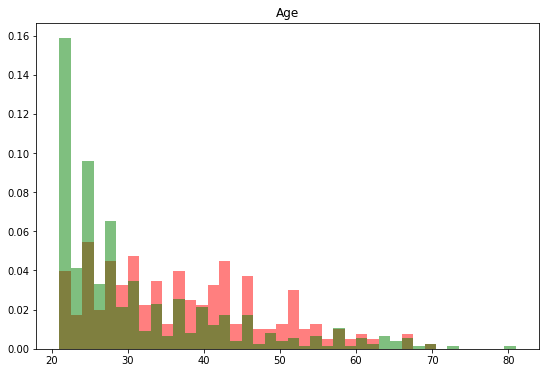

In [8]:
## Histogram of each feature, etc.

features = dataset.columns[:-1]

def histogram(feature):
    xx = dataset.loc[(dataset["Outcome"] == 0) & np.logical_not(dataset[feature].isnull()), feature]
    yy = dataset.loc[(dataset["Outcome"] == 1) & np.logical_not(dataset[feature].isnull()), feature]

    fig = plt.figure(figsize=(9, 6))
    kwargs = {
            'histtype' : 'stepfilled',
            'alpha'    : 0.5,
            'density'  : True,
            'bins'     : 40,
            'color'    : ['g', 'r', ],
    }
    plt.title(feature)
    plt.hist([xx, yy, ], **kwargs)
    # plt.show()
    fig.savefig('histogram_%s.png' % feature)

for feature in features:
    histogram(feature)

Some notes:

You'll need to specifically exclude data points where feature value is missing.

Scatterplot of pairs of correlated features
You may recall from the Pandas assignment that some pairs of features are highly correlated. Let's draw scatterplots for these pairs of variables and see what the plots look like.

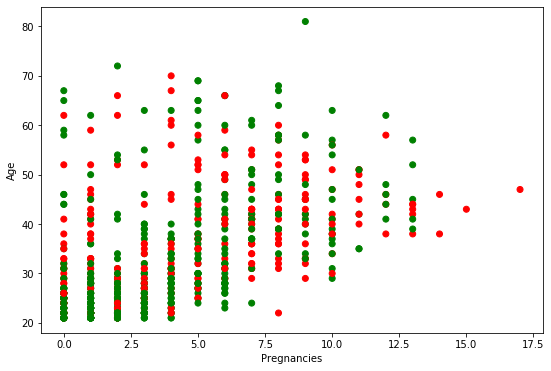

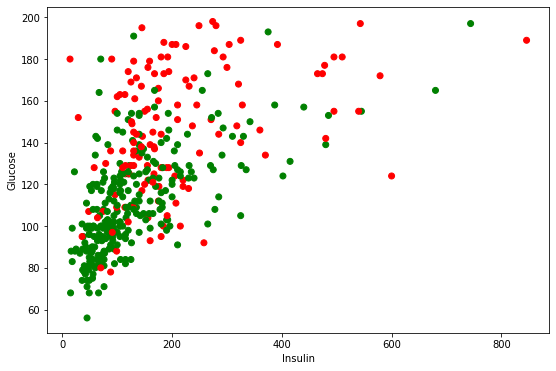

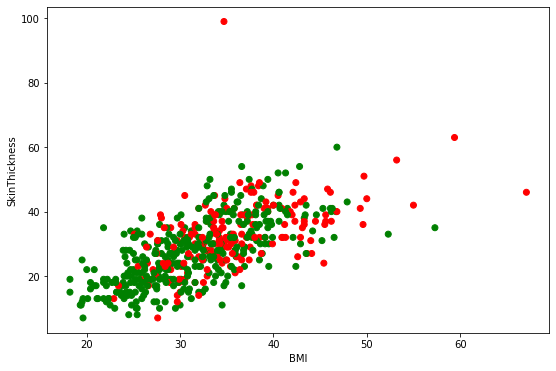

In [9]:
## Scatterplot of correlated pairs of variables

pairs = [
    ('Pregnancies', 'Age'),
    ('Insulin', 'Glucose'),
    ('BMI', 'SkinThickness'),
]

def scatterplot(v1, v2):
    good = np.logical_not(dataset[v1].isnull()) & np.logical_not(dataset[v2].isnull())
    xx = dataset.loc[good, v1]
    yy = dataset.loc[good, v2]
    cc = np.array(['g', 'r'])[dataset.loc[good, "Outcome"]]

    fig = plt.figure(figsize=(9, 6))
    plt.scatter(xx, yy, c=cc)

    plt.xlabel(v1)
    plt.ylabel(v2)

    # plt.show()
    fig.savefig('scatterplot_%s_%s.png' % (v1, v2))

for v1, v2 in pairs:
    scatterplot(v1, v2)

Some notes:

You'll need to ignore data points where values for either of the two variables are missing.

Reading the plots
BMI vs SkinThickness is the cleanest plot out of the three. It has a nice Gaussian distribution.

Glucose vs Insulin is also kind of clean, but notice that the values are much more densely packed towards the lower region, and more spread out for the higher values.

Pregnancies vs Age is the most 'dirty' plot of the three, mostly because pregnancies takes a small number of discrete values.

Finding pairs of variables that are indicators of diabetic vs non-diabetic
Create scatter plots for glucose vs each feature, similar to glucose vs insulin. And see which graph gives the best separation between the green and red data-points. The best feature will be the one that has the most information about the outcome, but isn't very correlated with glucose.